# Importações

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
# biblioteca de visualização para Análise de modelos
from yellowbrick.classifier import ConfusionMatrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
# biblioteca que fornece uma interface de alto nível para criar gráficos estatísticos
import seaborn as sns

# CARREGAR OS DADOS

In [32]:
dados = pd.read_csv('/content/Alerta_Terremotos_dataset.csv')

In [34]:
from scipy.special import expit

In [33]:
 dados.head(5)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [12]:
X = dados.iloc[:, :5].values  # Primeiras 5 colunas como features
y = dados.iloc[:, 5].values   # Coluna 'alert' como target


In [13]:
# Permiti dividir os dados em conjuntos de treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Definir parâmetros para GridSearch
parametros_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],    # Algoritmo de otimização
    'max_iter': [100, 200, 500]          # Número máximo de iterações
}

# GridSearch para Regressão Logística

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# Cria uma instância do modelo de Regressão Logística
# 5-fold cross validation
grid_lr = GridSearchCV(LogisticRegression(), parametros_lr, cv=5, scoring='accuracy')


In [ ]:
# Divide os dados de treino usando Validação Cruzada, depois Testa todas as 24 combinações de hiperparâmetros

grid_lr.fit(X_treino, y_treino)

In [50]:
# Fazer previsões com o melhor modelo
lr_best = grid_lr.best_estimator_

In [51]:
 # Array de previsões com melhor modelo treinado atraves de Conjunto de features de teste
predicoes_lr = lr_best.predict(X_teste)

In [52]:
# calcula a acurácia do modelo de Regressão Logística no conjunto de teste
accuracy_lr = accuracy_score(y_teste, predicoes_lr)

In [53]:
# Matriz de confusão para Regressão Logística
# Cria uma figura depois define o tamanho(L,A)
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Axes: >

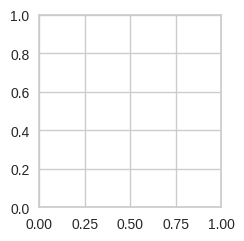

In [54]:
plt.subplot(2, 3, 1)

In [55]:
# calcula a matriz de confusão para avaliar o desempenho do modelo de classificação
cm_lr = confusion_matrix(y_teste, predicoes_lr)

In [56]:
# NumPy (Numerical Python) -> Arrays multidimensionais
import numpy as np

<Axes: >

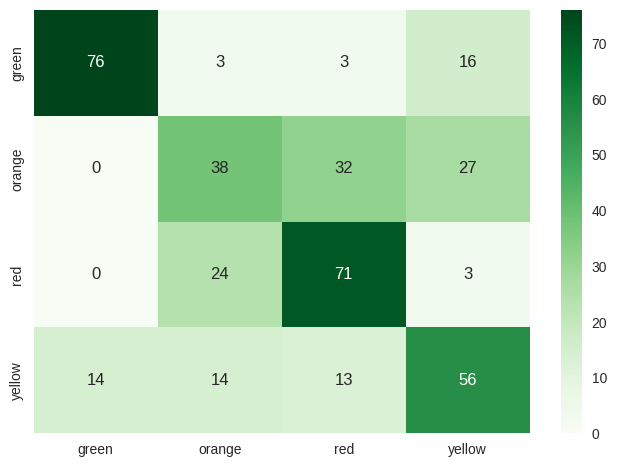

In [72]:
# cria uma visualização da matriz de confusão usando Seaborn com configurações específicas
# cm_lr,                    # Matriz de confusão calculada
# annot=True,               # Mostrar valores nas células
# fmt='d',                  # Formato decimal inteiro
# cmap='Blues',             # Mapa de cores azul
# xticklabels=np.unique(y), # Labels do eixo X (classes únicas)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Definir parâmetros para GridSearch
parametros_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# GridSearch para SVM
# LogisticRegression(),  # Modelo base
# parametros_svm,        # Grade de parâmetros definida anteriormente
# cv=5,                  # 5-fold cross validation( Validação Cruzada)
# scoring='accuracy'     # Métrica de avaliação

grid_svm = GridSearchCV(SVC(), parametros_svm, cv=5, scoring='accuracy')

In [ ]:
# Divide os dados de treino usando Validação Cruzada
grid_svm.fit(X_treino, y_treino)

In [ ]:
# Fazer previsões com o melhor modelo
svm_best = grid_svm.best_estimator_

In [ ]:
# Array de previsões com melhor modelo treinado atraves de Conjunto de features de teste
predicoes_svm = svm_best.predict(X_teste)

In [ ]:
# calcula a acurácia do modelo de Regressão Logística no conjunto de teste
accuracy_svm = accuracy_score(y_teste, predicoes_svm)

In [ ]:
# Matriz de confusão para SVM
plt.subplot(2, 3, 2)
cm_svm = confusion_matrix(y_teste, predicoes_svm)

In [ ]:
# cm_svm,                    # Matriz de confusão calculada
# annot=True,               # Mostrar valores nas células
# fmt='d',                  # Formato decimal inteiro
# cmap='Blues',             # Mapa de cores azul
# xticklabels=np.unique(y), # Labels do eixo X (classes únicas)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))

In [ ]:
# Personalizar título
plt.title('Matriz de Confusão - SVM')                  #
plt.xlabel('Predito')
plt.ylabel('Real')

# ÁRVORE DE CLASSIFICAÇÃO

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
parametros_arvore = {
    'criterion': ['gini', 'entropy'],          # Critério de divisão
    'max_depth': [5, 10, 15, 20, None],        # Profundidade máxima
    'min_samples_split': [2, 5, 10],           # Número mínimo de amostras para dividir
    'min_samples_leaf': [1, 2, 4]              # Número mínimo de amostras em uma folha
}


In [37]:
# GridSearch para Árvore de Classificação
grid_arvore = GridSearchCV(DecisionTreeClassifier(), parametros_arvore, cv=5, scoring='accuracy')

In [38]:
# Divide os dados de treino usando Validação Cruzada
grid_arvore.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
# Fazer previsões com o melhor modelo
arvore_best = grid_arvore.best_estimator_

In [40]:
predicoes_arvore = arvore_best.predict(X_teste)

In [41]:
# calcula a acurácia do modelo de Regressão Logística no conjunto de teste
accuracy_arvore = accuracy_score(y_teste, predicoes_arvore)

<Axes: >

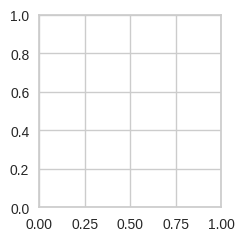

In [42]:
# Matriz de confusão para Árvore
plt.subplot(2, 3, 3)

In [43]:
cm_arvore = confusion_matrix(y_teste, predicoes_arvore)

<Axes: >

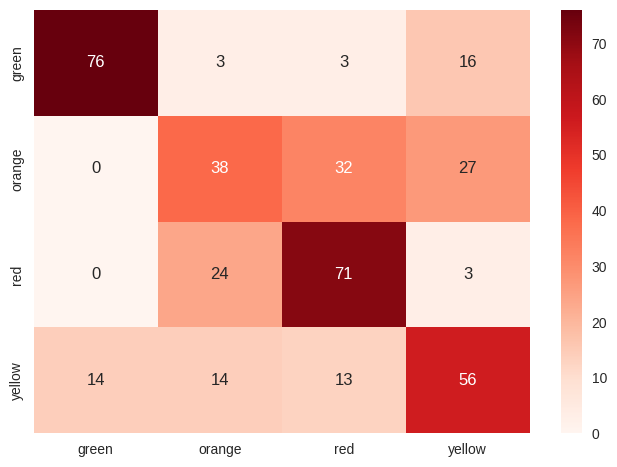

In [70]:
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))

Text(0, 0.5, 'Real')

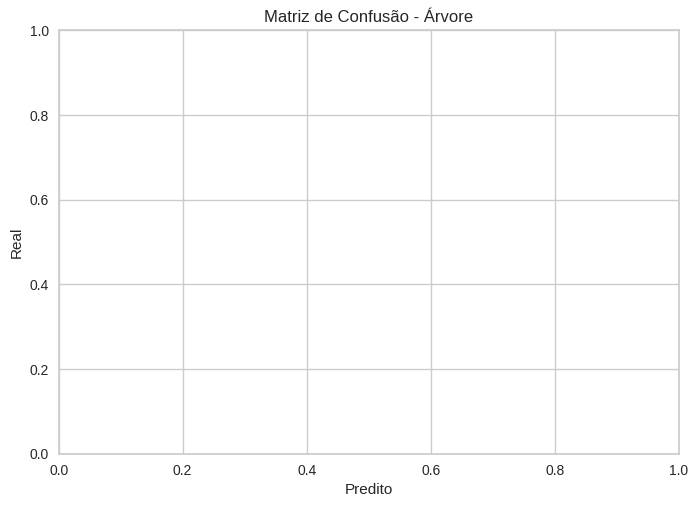

In [45]:
plt.title('Matriz de Confusão - Árvore')
plt.xlabel('Predito')
plt.ylabel('Real')

# KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
parametros_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [17]:
# GridSearch para KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), parametros_knn, cv=5, scoring='accuracy')

In [18]:
grid_knn.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:
# Fazer previsões com o melhor modelo
knn_best = grid_knn.best_estimator_

In [20]:
predicoes_knn = knn_best.predict(X_teste)

In [21]:
# calcula a acurácia do modelo de Regressão Logística no conjunto de teste
accuracy_knn = accuracy_score(y_teste, predicoes_knn)